<a href="https://colab.research.google.com/github/Khushgod/BA_Reviews/blob/main/British__Airways_Sentiment_Predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
#!pip install --upgrade --no-cache-dir --force-reinstall numpy gensim pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 174.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 130.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 130.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 262.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 273.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 294.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 311.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 216.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 272.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 296.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 253.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
# Create a DataFrame from the list of reviews
df = pd.DataFrame(reviews, columns=['reviews'])

# Now save the DataFrame to a CSV file
df.to_csv('reviews.csv', encoding ='utf-8')
df

,reviews
0,✅ Trip Verified | Although transferring to thi...
1,✅ Trip Verified | We are extremely grateful ...
2,✅ Trip Verified | I had an appalling experie...
3,"Not Verified | Good points, the cabin crew, t..."
4,"Not Verified | It was a decent flight, reason..."
...,...
995,✅ Trip Verified | Glasgow to London. Smooth fl...
996,✅ Trip Verified | Having booked this flight a ...
997,✅ Trip Verified | I wouldn't even rate them 1...
998,✅ Trip Verified | Flying London City to Geneva...



Step 1: Loading and preprocessing data

Step 2: Generating sentiment labels

Sentiment distribution:
sentiment
negative    501
positive    474
neutral      25
Name: count, dtype: int64

Using binary classification (positive/negative). 975 reviews after filtering neutral.

Sentiment classes: ['negative', 'positive']
Training set size: 780
Test set size: 195
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Step 5: Evaluating the model
--------------------------

Accuracy on test set: 0.8462

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.89      0.86       100
    positive       0.87      0.80      0.84        95

    accuracy                           0.85       195
   macro avg       0.85      0.84      0.85       195
weighted avg       0.85      0.85      0.85       195



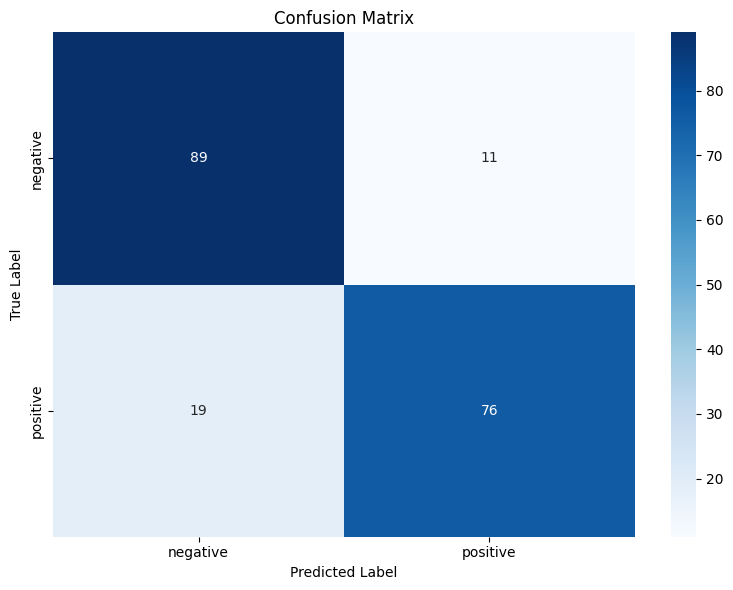

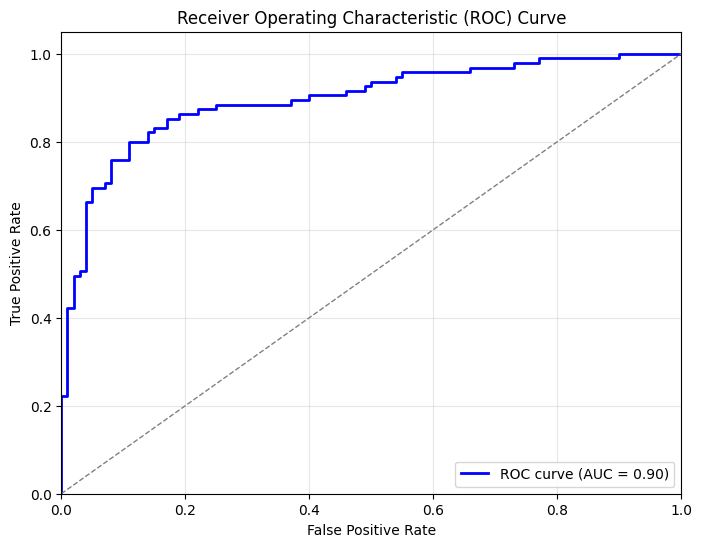

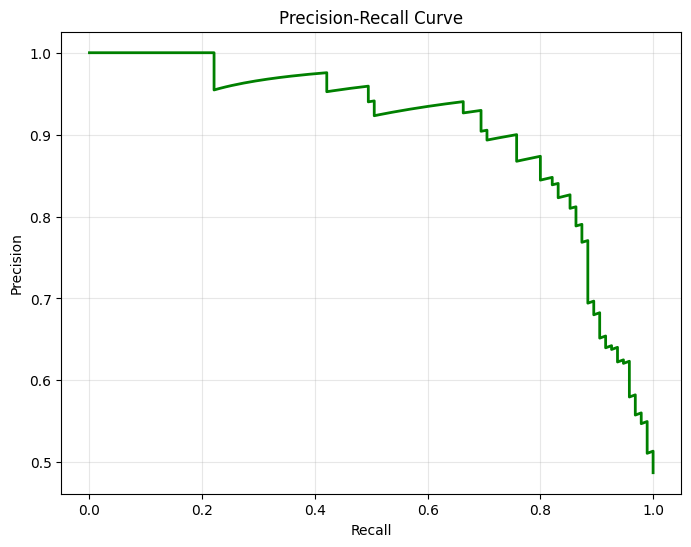


Step 6: Analyzing feature importance
----------------------------------


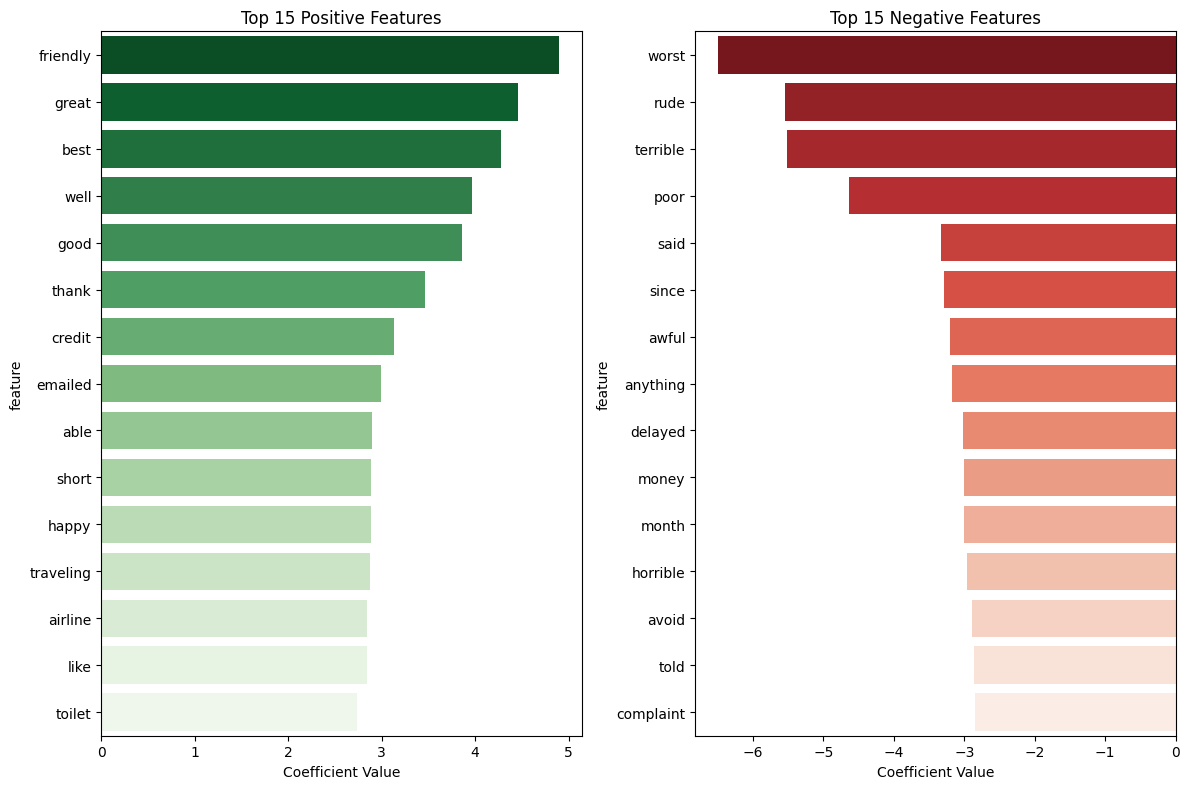


Model and label encoder saved to 'output/model/' directory


In [4]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# Dictionary of required packages
required_packages = {
    'pandas': 'pandas',
    'numpy': 'numpy',
    'matplotlib': 'matplotlib',
    'seaborn': 'seaborn',
    're': None,  # built-in
    'nltk': 'nltk',
    'wordcloud': 'wordcloud',
    'sklearn': 'scikit-learn',
    'joblib': 'joblib',  # For model persistence
    'textblob': 'textblob'
}

# Check for missing packages and install if necessary
missing_packages = []

for package, pip_name in required_packages.items():
    if pip_name:  # Skip built-in modules
        try:
            __import__(package)
        except ImportError:
            missing_packages.append(pip_name)

if missing_packages:
    print("Missing required packages. Please install them using pip:")
    print(f"pip install {' '.join(missing_packages)}")
    sys.exit(1)

# Import required packages after check
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
import joblib

# Download necessary NLTK data
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('vader_lexicon', quiet=True)

# Create output directory for models and visualizations
os.makedirs('output/model', exist_ok=True)

# STEP 1: LOAD AND PREPROCESS DATA
print("\nStep 1: Loading and preprocessing data")

# Read the data
df_read = pd.read_csv('reviews.csv')

def extract_verification_and_text(review_line):
    parts = str(review_line).strip().split('|', 1)  # Split only on the first '|'
    if len(parts) == 2:
        verify_status = parts[0].strip().lower() == 'verified'  # Convert to boolean
        text = parts[1].strip()
    else:
        # Handle cases where the format might not be as expected
        verify_status = False  # Assume not verified if format is off
        text = str(review_line).strip()  # Use the whole line as text

    return verify_status, text

# Create dataframe with verification status and review text
df = pd.DataFrame()
df['verified'], df['review_text'] = zip(*df_read['reviews'].apply(extract_verification_and_text))

# Clean text function
def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()

    # Remove special characters and emojis
    text = re.sub(r'[^\w\s.]', ' ', text)

    # Replace unicode characters
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply text cleaning
df['clean_review'] = df['review_text'].apply(clean_text)

# Tokenize, remove stopwords, and lemmatize
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    custom_stopwords = {'british', 'airways', 'ba', 'flight', 'airline', 'plane', 'aircraft', 'fly', 'flying'}
    stop_words.update(custom_stopwords)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply text preprocessing
df['processed_text'] = df['clean_review'].apply(preprocess_text)

# STEP 2: GENERATE SENTIMENT LABELS

print("\nStep 2: Generating sentiment labels")

# Initialize sentiment analyzer
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Get sentiment scores
df['sentiment_scores'] = df['clean_review'].apply(lambda x: sia.polarity_scores(x))
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Categorize sentiment (target variable for ML model)
df['sentiment'] = df['compound_score'].apply(
    lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Print sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print("\nSentiment distribution:")
print(sentiment_counts)

# For binary classification, we'll focus on positive and negative
# This is optional - we can also do multiclass with positive, neutral, negative
binary_classification = True

if binary_classification:
    # Filter out neutral reviews for binary classification
    df_ml = df[df['sentiment'] != 'neutral'].copy()
    print(f"\nUsing binary classification (positive/negative). {len(df_ml)} reviews after filtering neutral.")
else:
    # Use all data for multiclass classification
    df_ml = df.copy()
    print(f"\nUsing multiclass classification (positive/neutral/negative). {len(df_ml)} total reviews.")

# Encode the target variable
le = LabelEncoder()
df_ml['sentiment_encoded'] = le.fit_transform(df_ml['sentiment'])
print(f"\nSentiment classes: {list(le.classes_)}")

# STEP 3: TRAIN-TEST SPLIT

# Split features and target
X = df_ml['processed_text']
y = df_ml['sentiment_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# STEP 4: BUILD AND TRAIN THE MODEL

# Create a pipeline with TF-IDF vectorizer and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000, ngram_range=(1, 2))),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Define hyperparameter grid for grid search
param_grid = {
    'tfidf__max_features': [500, 1000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__solver': ['liblinear', 'saga']
}

# For smaller datasets, reduce the hyperparameter space
if len(X_train) < 100:
    param_grid = {
        'tfidf__max_features': [500],
        'classifier__C': [1.0],
        'classifier__solver': ['liblinear']
    }

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)

grid_search.fit(X_train, y_train)


# Get the best model from grid search
best_model = grid_search.best_estimator_

# STEP 5: EVALUATE THE MODEL
# --------------------------
print("\nStep 5: Evaluating the model")
print("--------------------------")

# Predict on test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('output/model/confusion_matrix.png')
plt.show()
plt.close()

# If binary classification, plot ROC curve
if len(le.classes_) == 2:
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.savefig('output/model/roc_curve.png')
    plt.show()
    plt.close()

    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='green', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(alpha=0.3)
    plt.savefig('output/model/precision_recall_curve.png')
    plt.show()
    plt.close()

# STEP 6: FEATURE IMPORTANCE
# -------------------------
print("\nStep 6: Analyzing feature importance")
print("----------------------------------")

# Extract the vectorizer and classifier from the pipeline
vectorizer = best_model.named_steps['tfidf']
classifier = best_model.named_steps['classifier']

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Get coefficients from the model
if hasattr(classifier, 'coef_'):
    coefficients = classifier.coef_[0] if len(classifier.coef_) == 1 else classifier.coef_

    # Create DataFrame of features and their coefficients
    if len(le.classes_) == 2:  # Binary classification
        feature_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': coefficients
        })

        # Sort by absolute importance
        feature_importance['abs_importance'] = feature_importance['importance'].abs()
        feature_importance = feature_importance.sort_values('abs_importance', ascending=False)

        # Plot top positive and negative features
        plt.figure(figsize=(12, 8))

        # Top 15 positive features
        plt.subplot(1, 2, 1)
        top_positive = feature_importance[feature_importance['importance'] > 0].head(15)
        sns.barplot(x='importance', y='feature', data=top_positive, palette='Greens_r')
        plt.title('Top 15 Positive Features')
        plt.xlabel('Coefficient Value')
        plt.tight_layout()

        # Top 15 negative features
        plt.subplot(1, 2, 2)
        top_negative = feature_importance[feature_importance['importance'] < 0].head(15)
        sns.barplot(x='importance', y='feature', data=top_negative, palette='Reds_r')
        plt.title('Top 15 Negative Features')
        plt.xlabel('Coefficient Value')

        plt.tight_layout()
        plt.savefig('output/model/feature_importance.png')
        plt.show()
        plt.close()

    else:  # Multiclass classification
        for i, class_name in enumerate(le.classes_):
            feature_importance = pd.DataFrame({
                'feature': feature_names,
                'importance': coefficients[i]
            })

            feature_importance['abs_importance'] = feature_importance['importance'].abs()
            feature_importance = feature_importance.sort_values('abs_importance', ascending=False)

            # Plot top 10 features for this class
            plt.figure(figsize=(10, 6))
            top_features = feature_importance.head(20)
            colors = np.where(top_features['importance'] > 0, 'green', 'red')
            sns.barplot(x='importance', y='feature', data=top_features, palette=colors)
            plt.title(f'Top 20 Features for {class_name.capitalize()} Class')
            plt.tight_layout()
            plt.savefig(f'output/model/feature_importance_{class_name}.png')
            plt.show()
            plt.close()

# Save the best model
joblib.dump(best_model, 'output/model/sentiment_classifier.joblib')
joblib.dump(le, 'output/model/label_encoder.joblib')

print("\nModel and label encoder saved to 'output/model/' directory")

# STEP 8: FUNCTION FOR SENTIMENT PREDICTION

def predict_sentiment(text, model=best_model, encoder=le):
    """
    Predict sentiment for a given text using the trained model.

    Args:
        text (str): Text to analyze
        model: Trained model pipeline
        encoder: Label encoder used for training

    Returns:
        dict: Dictionary containing sentiment prediction and probabilities
    """
    # Clean and preprocess the text
    clean_text_result = clean_text(text)
    processed_text_result = preprocess_text(clean_text_result)

    # Predict using the model
    sentiment_id = model.predict([processed_text_result])[0]
    probabilities = model.predict_proba([processed_text_result])[0]

    # Get the predicted sentiment class
    sentiment_class = encoder.inverse_transform([sentiment_id])[0]

    # Create result dictionary
    result = {
        'sentiment': sentiment_class,
        'probabilities': {}
    }

    # Add probability for each class
    for i, class_name in enumerate(encoder.classes_):
        result['probabilities'][class_name] = float(probabilities[i])

    return result
